In [1]:
import pandas as pd
import os
import openpyxl

In [2]:
ano = range(2015, 2025)

caminho = r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\raw'

df = pd.DataFrame()

for a in ano:
    arquivo = f'BancoVDE {a}.xlsx'
    caminho_completo = os.path.join(caminho, arquivo)

    try:
        df_temp = pd.read_excel(caminho_completo)
        df = pd.concat([df, df_temp], ignore_index=True) # concatena o dataframe temporario ao dataframe principal
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {caminho_completo}")

df

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total,total_peso,abrangencia,formulario,total_vitimas,total_vitima
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estadual,Formulário 5,NaN,NaN
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.890,Estadual,Formulário 5,NaN,NaN
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660,Estadual,Formulário 5,NaN,NaN
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127,Estadual,Formulário 5,NaN,NaN
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.100,Estadual,Formulário 5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113284,RS,NÃO INFORMADO,Tráfico de drogas,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1208.0,NaN,Estadual,Formulário 4,NaN,NaN
6113285,SC,NÃO INFORMADO,Tráfico de drogas,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,447.0,NaN,Estadual,Formulário 4,NaN,NaN
6113286,SE,NÃO INFORMADO,Tráfico de drogas,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,Estadual,Formulário 4,NaN,NaN
6113287,SP,NÃO INFORMADO,Tráfico de drogas,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estadual,Formulário 4,NaN,NaN


In [3]:
#df.to_pickle(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df.pkl')
#df.to_csv(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df.csv')
df.to_parquet(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df.parquet')

In [12]:
df_seg = pd.read_parquet(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df.parquet')
df_seg['qtde_vitimas'] = df_seg['total_vitima'].fillna(0) + df_seg['total_vitimas'].fillna(0)
df_seg['ano'] = df_seg['data_referencia'].dt.year
df_seg['chave'] = df_seg['uf'] + df_seg['ano'].astype(str)
print(df_seg.head())
print(df_seg.info())

   uf      municipio                evento data_referencia agente  arma  \
0  AC  NÃO INFORMADO  Apreensão de Cocaína      2015-01-01   None  None   
1  AL  NÃO INFORMADO  Apreensão de Cocaína      2015-01-01   None  None   
2  AM  NÃO INFORMADO  Apreensão de Cocaína      2015-01-01   None  None   
3  AP  NÃO INFORMADO  Apreensão de Cocaína      2015-01-01   None  None   
4  BA  NÃO INFORMADO  Apreensão de Cocaína      2015-01-01   None  None   

  faixa_etaria  feminino  masculino  nao_informado  total  total_peso  \
0         None       NaN        NaN            NaN    NaN         NaN   
1         None       NaN        NaN            NaN    NaN      19.890   
2         None       NaN        NaN            NaN    NaN      40.660   
3         None       NaN        NaN            NaN    NaN       0.127   
4         None       NaN        NaN            NaN    NaN      16.100   

  abrangencia    formulario  total_vitimas  total_vitima  qtde_vitimas   ano  \
0    Estadual  Formulário 5   

In [13]:
df_seg.groupby('evento')[['total','total_peso','qtde_vitimas']].sum()

,total,total_peso,qtde_vitimas
evento,,,
Apreensão de Cocaína,0.0,8.001538e+05,0.0
Apreensão de Maconha,0.0,1.049170e+07,0.0
Arma de Fogo Apreendida,1060217.0,0.000000e+00,0.0
Atendimento pré-hospitalar,9294316.0,0.000000e+00,0.0
Busca e salvamento,4095099.0,0.000000e+00,0.0
Combate a incêndios,2574431.0,0.000000e+00,0.0
Emissão de Alvarás de licença,8185496.0,0.000000e+00,0.0
Estupro,0.0,0.000000e+00,686970.0
Feminicídio,0.0,0.000000e+00,11718.0


In [14]:
df_unificado = df_seg.copy()
df_unificado['valor'] = df_unificado['qtde_vitimas'].fillna(0) + df_unificado['total'].fillna(0) + df_unificado['total_peso'].fillna(0)
df_unificado.head()

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total,total_peso,abrangencia,formulario,total_vitimas,total_vitima,qtde_vitimas,ano,chave,valor
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,NaN,NaN,Estadual,Formulário 5,NaN,NaN,0.0,2015,AC2015,0.000
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,NaN,19.890,Estadual,Formulário 5,NaN,NaN,0.0,2015,AL2015,19.890
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,NaN,40.660,Estadual,Formulário 5,NaN,NaN,0.0,2015,AM2015,40.660
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,NaN,0.127,Estadual,Formulário 5,NaN,NaN,0.0,2015,AP2015,0.127
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,NaN,16.100,Estadual,Formulário 5,NaN,NaN,0.0,2015,BA2015,16.100


In [15]:
df_unificado['categoria'] = df_unificado['evento'].apply(
    lambda x: 'Crimes Contra a Vida' if x in lista_crimes_contra_vida else
              'Roubos e Furtos' if x in lista_crimes_roubos_furtos else
              'Apreensão de Armas' if x == 'Arma de Fogo Apreendida' else
              'Ocorrências não violentas' if x in lista_ocorrencias_nao_crimes else x
)


In [17]:
df_unificado

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,...,total_peso,abrangencia,formulario,total_vitimas,total_vitima,qtde_vitimas,ano,chave,valor,categoria
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,NaN,Estadual,Formulário 5,NaN,NaN,0.0,2015,AC2015,0.000,Apreensão de Cocaína
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,19.890,Estadual,Formulário 5,NaN,NaN,0.0,2015,AL2015,19.890,Apreensão de Cocaína
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,40.660,Estadual,Formulário 5,NaN,NaN,0.0,2015,AM2015,40.660,Apreensão de Cocaína
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,0.127,Estadual,Formulário 5,NaN,NaN,0.0,2015,AP2015,0.127,Apreensão de Cocaína
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,16.100,Estadual,Formulário 5,NaN,NaN,0.0,2015,BA2015,16.100,Apreensão de Cocaína
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113284,RS,NÃO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,NaN,Estadual,Formulário 4,NaN,NaN,0.0,2024,RS2024,1208.000,Tráfico de drogas
6113285,SC,NÃO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,NaN,Estadual,Formulário 4,NaN,NaN,0.0,2024,SC2024,447.000,Tráfico de drogas
6113286,SE,NÃO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,NaN,Estadual,Formulário 4,NaN,NaN,0.0,2024,SE2024,118.000,Tráfico de drogas
6113287,SP,NÃO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,NaN,Estadual,Formulário 4,NaN,NaN,0.0,2024,SP2024,0.000,Tráfico de drogas


In [18]:
df_unificado.to_parquet(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df_unificado.parquet')

In [23]:
df_unificado.value_counts('categoria')

categoria
Crimes Contra a Vida                                                  2684413
Ocorrências não violentas                                             1379036
Morte no trânsito ou em decorrência dele (exceto homicídio doloso)     664090
Tentativa de homicídio                                                 664090
Mortes a esclarecer (sem indício de crime)                             664090
Apreensão de Armas                                                      28827
Roubos e Furtos                                                         12804
Tráfico de drogas                                                        3201
Apreensão de Maconha                                                     3191
Apreensão de Cocaína                                                     3191
Morte por intervenção de Agente do Estado                                3178
Estupro                                                                  3178
Name: count, dtype: int64

In [8]:
lista_crimes_contra_vida = ['Homicídio doloso', 'Lesão corporal seguida de morte','Feminicídio','Roubo seguido de morte (latrocínio)','Morte de Agente do Estado',]
lista_crimes_roubos_furtos = ['Roubo a instituição financeira','Roubo de carga','Roubo de veículo','Furto de veículo']
lista_ocorrencias_nao_crimes = ['Realização de vistorias','Combate a incêndios','Emissão de Alvarás de licença','Busca e salvamento','Atendimento pré-hospitalar','Pessoa Localizada','Pessoa Desaparecida','Suicídio de Agente do Estado','Mandado de prisão cumprido','Suicídio']

In [30]:
resultado = {}

for i in df_unificado['evento'].unique():
    resultado[i] = df_unificado[df_unificado['evento'] == i].groupby('chave')['valor'].sum()

In [29]:
categoria = {}

for i in df_unificado['categoria'].unique():
    categoria[i] = df_unificado[df_unificado['categoria'] == i].groupby('chave')['valor'].sum()

In [32]:
categoria.keys()

dict_keys(['Apreensão de Cocaína', 'Apreensão de Maconha', 'Apreensão de Armas', 'Ocorrências não violentas', 'Estupro', 'Crimes Contra a Vida', 'Roubos e Furtos', 'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)', 'Morte por intervenção de Agente do Estado', 'Mortes a esclarecer (sem indício de crime)', 'Tentativa de homicídio', 'Tráfico de drogas'])

In [33]:
# Convert the resultado dictionary to a DataFrame
df_resultado = pd.DataFrame(resultado)
df_categoria = pd.DataFrame(categoria)

In [34]:
df_categoria.describe()

,Apreensão de Cocaína,Apreensão de Maconha,Apreensão de Armas,Ocorrências não violentas,Estupro,Crimes Contra a Vida,Roubos e Furtos,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Morte por intervenção de Agente do Estado,Mortes a esclarecer (sem indício de crime),Tentativa de homicídio,Tráfico de drogas
count,266.00000,266.000000,267.000000,268.000000,265.000000,267.000000,267.000000,267.000000,265.000000,267.00000,267.000000,267.000000
mean,3008.09706,39442.498414,3970.850187,127971.503731,2592.339623,1770.333333,16264.917603,892.853933,193.630189,535.76030,1563.295880,6742.602996
std,6685.38640,109646.374606,4790.499655,181559.416542,2822.920064,1531.890477,30450.572581,995.621220,325.780658,1035.89368,1592.403224,9909.353408
min,0.00000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,34.01175,126.257750,817.000000,14804.750000,784.000000,583.500000,3472.000000,249.000000,26.000000,18.00000,503.500000,1010.500000
50%,463.89650,2974.675000,2248.000000,43117.000000,1658.000000,1172.000000,6191.000000,610.000000,74.000000,173.00000,967.000000,3660.000000
75%,2779.50850,16420.605000,5809.000000,151132.000000,3580.000000,2734.000000,15223.500000,1111.500000,150.000000,440.50000,2224.500000,6835.000000
max,41935.58400,755052.644000,27001.000000,860496.000000,15536.000000,6804.000000,198961.000000,5468.000000,1814.000000,6192.00000,7691.000000,49346.000000


In [48]:
matriz_correlacao_cartegorias = df_categoria.corr()

matriz_correlacao_cartegorias["Tráfico de drogas"].sort_values(ascending=False)

Tráfico de drogas                                                     1.000000
Morte no trânsito ou em decorrência dele (exceto homicídio doloso)    0.890105
Estupro                                                               0.882247
Roubos e Furtos                                                       0.867616
Apreensão de Armas                                                    0.864164
Tentativa de homicídio                                                0.827500
Ocorrências não violentas                                             0.806756
Mortes a esclarecer (sem indício de crime)                            0.613454
Crimes Contra a Vida                                                  0.530369
Morte por intervenção de Agente do Estado                             0.481513
Apreensão de Cocaína                                                  0.431852
Apreensão de Maconha                                                  0.155743
Name: Tráfico de drogas, dtype: float64

In [60]:
matriz_correlacao_cartegorias[['Tráfico de drogas', 'Roubos e Furtos', 'Apreensão de Armas', 'Crimes Contra a Vida']]

,Tráfico de drogas,Roubos e Furtos,Apreensão de Armas,Crimes Contra a Vida
Apreensão de Cocaína,0.431852,0.518747,0.209344,0.054758
Apreensão de Maconha,0.155743,0.140270,0.045471,-0.069480
Apreensão de Armas,0.864164,0.632127,1.000000,0.581172
Ocorrências não violentas,0.806756,0.788662,0.579137,0.328903
Estupro,0.882247,0.857950,0.683990,0.512853
Crimes Contra a Vida,0.530369,0.508492,0.581172,1.000000
Roubos e Furtos,0.867616,1.000000,0.632127,0.508492
Morte no trânsito ou em decorrência dele (exceto homicídio doloso),0.890105,0.902606,0.743307,0.604143
Morte por intervenção de Agente do Estado,0.481513,0.513123,0.305313,0.565101
Mortes a esclarecer (sem indício de crime),0.613454,0.689099,0.376074,0.443809


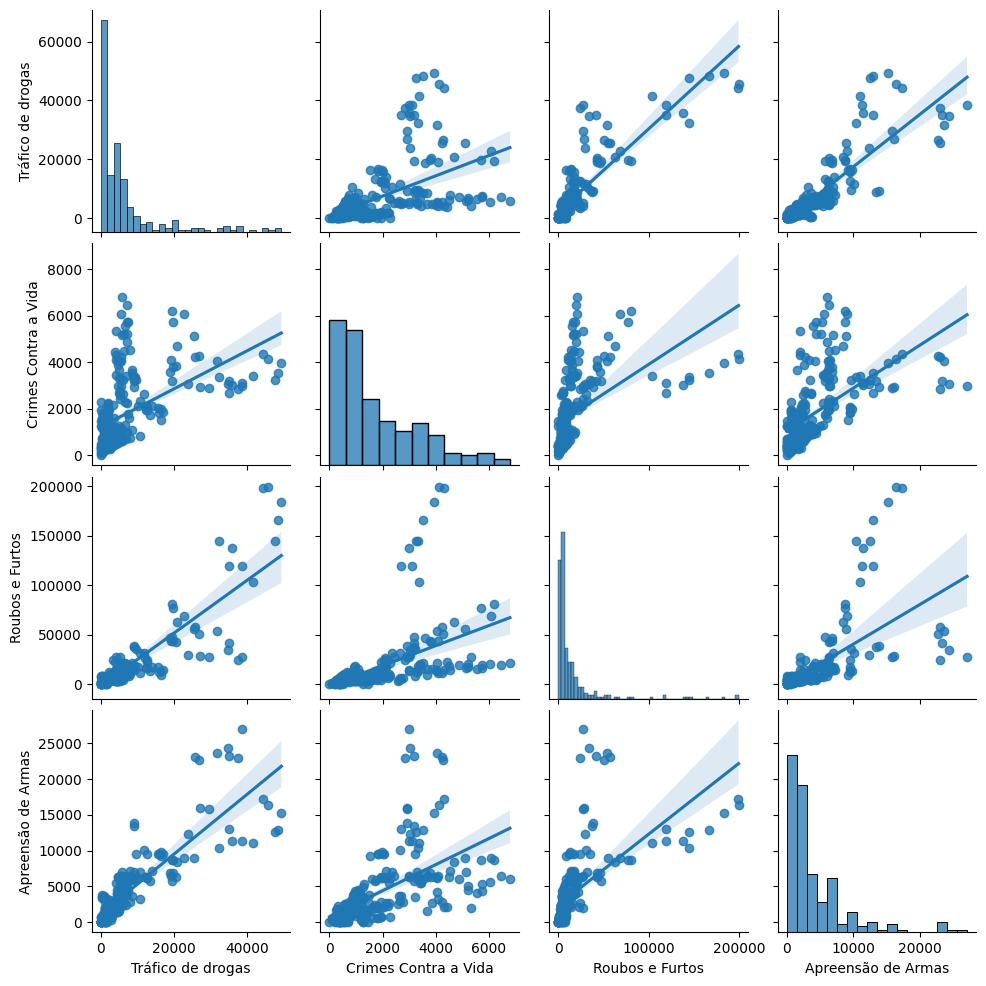

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_resultado seja o seu DataFrame
sns.pairplot(df_categoria, vars = ['Tráfico de drogas', 'Crimes Contra a Vida','Roubos e Furtos','Apreensão de Armas'], kind='reg')
plt.show() # Adicionado para exibir o gráfico

In [44]:
# Calculate the Pearson correlation
correlation_matrix = df_resultado.corr(method='pearson')

# Display the correlation matrix
correlation_matrix['Tráfico de drogas'].sort_values(ascending=False)

Tráfico de drogas                                                     1.000000
Suicídio                                                              0.903601
Pessoa Desaparecida                                                   0.897660
Morte no trânsito ou em decorrência dele (exceto homicídio doloso)    0.890105
Estupro                                                               0.882247
Furto de veículo                                                      0.866314
Arma de Fogo Apreendida                                               0.864164
Combate a incêndios                                                   0.843707
Atendimento pré-hospitalar                                            0.830047
Tentativa de homicídio                                                0.827500
Mandado de prisão cumprido                                            0.811617
Pessoa Localizada                                                     0.805984
Feminicídio                                         